# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tazovsky
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | mzimba
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | constantia
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | dudinka
Processing Record 8 of Set 1 | coahuayana de hidalgo
Processing Record 9 of Set 1 | niafunke
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | vadso
Processing Record 12 of Set 1 | luena
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | road town
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | minas de matahambre
City not found. Skipping...
Processing Record 17 of Set 1 | gadzhiyevo
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | karratha
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tazovsky,67.4667,78.7000,-25.55,99,69,4.51,RU,1712696040
1,port mathurin,-19.6833,63.4167,26.81,74,0,3.24,MU,1712696040
2,mzimba,-11.9000,33.6000,17.32,95,14,2.62,MW,1712696041
3,constantia,44.1833,28.6500,10.39,78,0,2.23,RO,1712695957
4,jamestown,42.0970,-79.2353,23.07,43,40,5.66,US,1712695859


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\ulyan\UTOR-VIRT-DATA-PT-02-2024-U-LOLC\python-api-challenge\output_data\cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\ulyan\UTOR-VIRT-DATA-PT-02-2024-U-LOLC\python-api-challenge\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,-25.55,99,69,4.51,RU,1712696040
1,port mathurin,-19.6833,63.4167,26.81,74,0,3.24,MU,1712696040
2,mzimba,-11.9000,33.6000,17.32,95,14,2.62,MW,1712696041
3,constantia,44.1833,28.6500,10.39,78,0,2.23,RO,1712695957
4,jamestown,42.0970,-79.2353,23.07,43,40,5.66,US,1712695859


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

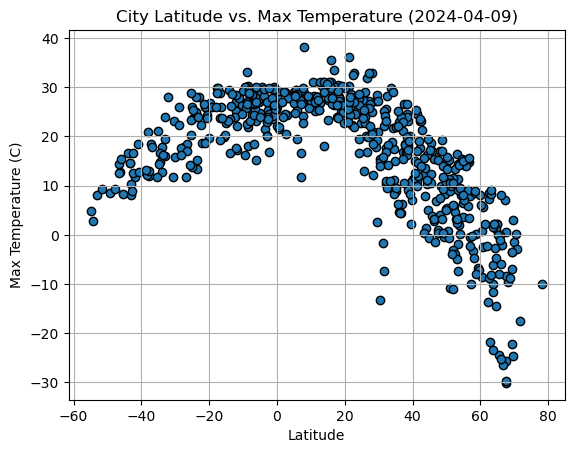

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors= "k")

# Incorporate the other graph properties
#Impotrt datetime for easier converion of the date from UTC time Unix timestamp
from datetime import datetime
#Find the date of the first observation
time = city_data_df["Date"][0]
#Convert date to desired format
utc_date = datetime.utcfromtimestamp(time).strftime('%Y-%m-%d')

# Set the title
plt.title(f"City Latitude vs. Max Temperature ({utc_date})")

#Set x-label
plt.xlabel("Latitude")

#Set y-label
plt.ylabel("Max Temperature (C)")

#Set grid
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\ulyan\UTOR-VIRT-DATA-PT-02-2024-U-LOLC\python-api-challenge\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

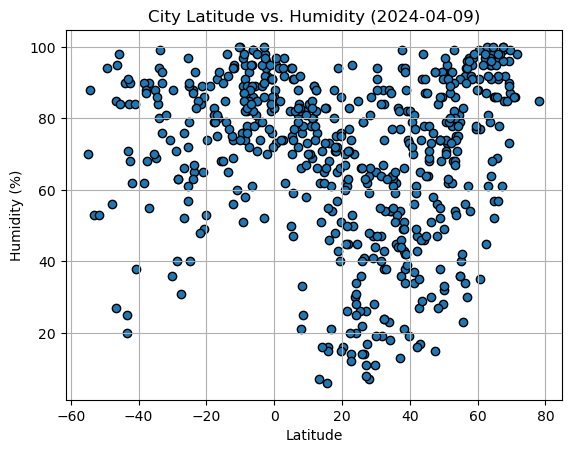

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors= "k")

# Incorporate the other graph properties
# Set the title
plt.title(f"City Latitude vs. Humidity ({utc_date})")

#Set x-label
plt.xlabel("Latitude")

#Set y-label
plt.ylabel("Humidity (%)")

#Set grid
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\ulyan\UTOR-VIRT-DATA-PT-02-2024-U-LOLC\python-api-challenge\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

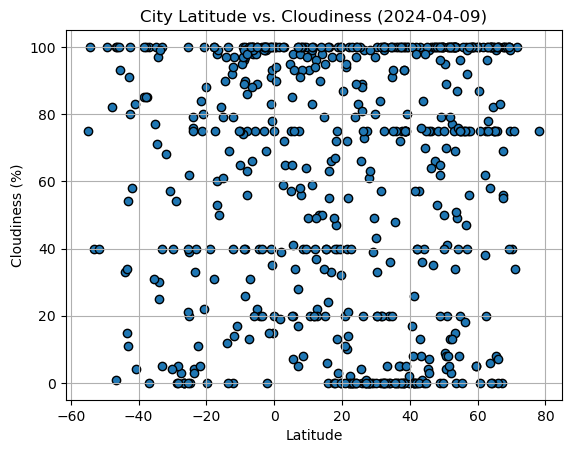

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors= "k")

# Incorporate the other graph properties
# Set the title
plt.title(f"City Latitude vs. Cloudiness ({utc_date})")

#Set x-label
plt.xlabel("Latitude")

#Set y-label
plt.ylabel("Cloudiness (%)")

#Set grid
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\ulyan\UTOR-VIRT-DATA-PT-02-2024-U-LOLC\python-api-challenge\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

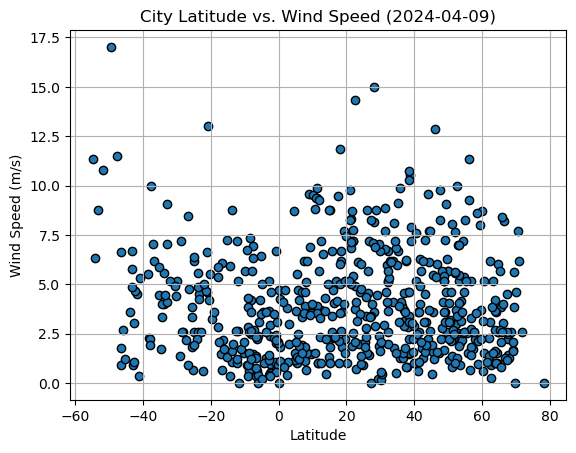

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors= "k")

# Incorporate the other graph properties
# Set the title
plt.title(f"City Latitude vs. Wind Speed ({utc_date})")

#Set x-label
plt.xlabel("Latitude")

#Set y-label
plt.ylabel("Wind Speed (m/s)")

#Set grid
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\ulyan\UTOR-VIRT-DATA-PT-02-2024-U-LOLC\python-api-challenge\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
#Defining the function with four arguments (x and y cordinate and their respective labels)
def lin_reg_plot(x, y, xlabel, ylabel):
    #Calculating slope, intercept and rvalue
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    #Printing r-value
    print(f"The r-value is: {rvalue}")
    #Plotting the scatter plot
    plt.scatter(x, y)
    #Assigning x label
    plt.xlabel(xlabel)
    #Assigning y label
    plt.ylabel(ylabel)
    #Calculating the regress values for regression line
    regress_values = x * slope + intercept
    #Defining linear regression line eqation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Plotting regression line
    plt.plot(x, regress_values, "r-")
    #Adding the regression line eqaion to the graph 
    plt.annotate(line_eq, (x.mean(), regress_values.mean() + 10), fontsize=15,color="red")
    #Displaing the graph
    plt.show()


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,-25.55,99,69,4.51,RU,1712696040
3,constantia,44.1833,28.6500,10.39,78,0,2.23,RO,1712695957
4,jamestown,42.0970,-79.2353,23.07,43,40,5.66,US,1712695859
5,dudinka,69.4058,86.1778,-22.12,96,100,5.64,RU,1712696041
6,coahuayana de hidalgo,18.7000,-103.6583,30.35,43,3,3.58,MX,1712696041


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port mathurin,-19.6833,63.4167,26.81,74,0,3.24,MU,1712696040
2,mzimba,-11.9000,33.6000,17.32,95,14,2.62,MW,1712696041
8,port-aux-francais,-49.3500,70.2167,8.54,94,100,17.02,TF,1712696041
10,luena,-11.7833,19.9167,22.10,94,97,0.00,AO,1712696041
11,edinburgh of the seven seas,-37.0676,-12.3116,18.53,90,100,7.06,SH,1712696042


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8215329191349643


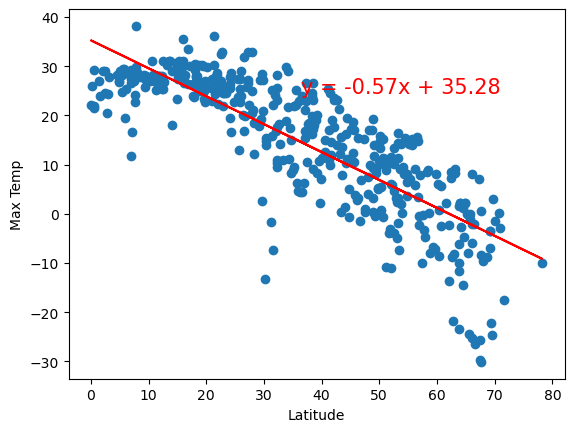

In [33]:
# Linear regression on Northern Hemisphere
#Defining arguments for liear regrssion plotting fuction
north_temp = northern_hemi_df["Max Temp"]
north_lat = northern_hemi_df["Lat"]
north_temp_lbl = "Max Temp"
north_lat_lbl = "Latitude"

#Plotting the graph and displaying r-value
lin_reg_plot(north_lat, north_temp, north_lat_lbl, north_temp_lbl)

The r-value is: 0.767562686420933


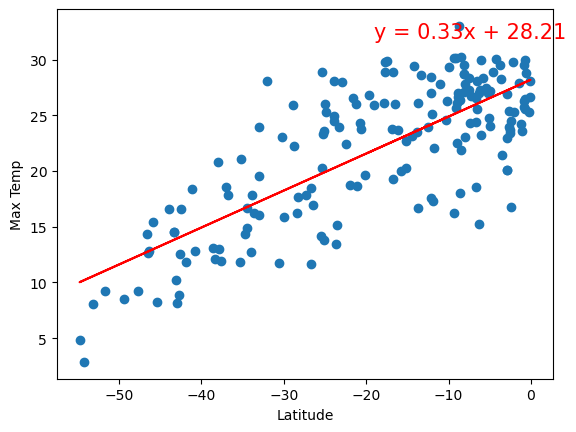

In [34]:
# Linear regression on Southern Hemisphere
#Defining arguments for liear regrssion plotting fuction
south_temp = southern_hemi_df["Max Temp"]
south_lat = southern_hemi_df["Lat"]
south_temp_lbl = "Max Temp"
south_lat_lbl = "Latitude"

#Plotting the graph and displaying r-value
lin_reg_plot(south_lat, south_temp, south_lat_lbl, south_temp_lbl)

**Discussion about the linear relationship:** The linear regression graphs for both Northern and Southern hemispheres shows strong relationship between latitude and tempriture. The graph that depicts this relationship in Northern hemisphere shows negative realationship: as latitude increases the maximum tempriture will go lower. In Southern hemisphere the relationship is positive: as latitude increases the tempreturu is rises as well. This conclusion is also strengthen by respective r-values: r-north = -0.82, and r-south = 0.76. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.215485338651233


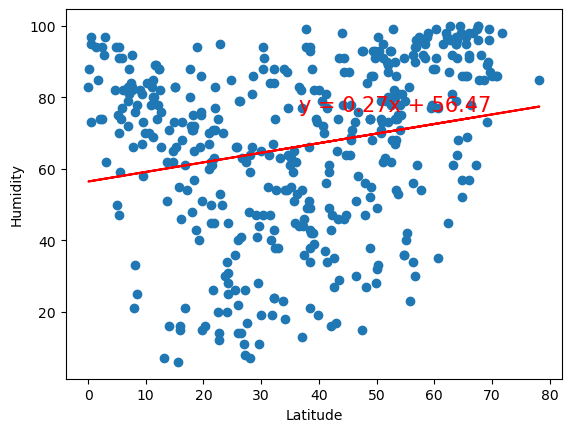

In [37]:
# Northern Hemisphere
#Defining arguments for liear regrssion plotting fuction 
#(the latitude variable and label was defined previously)
north_hum = northern_hemi_df["Humidity"]
north_hum_lbl = "Humidity"

#Plotting the graph and displaying r-value
lin_reg_plot(north_lat, north_hum, north_lat_lbl, north_hum_lbl)

The r-value is: 0.32276348223485946


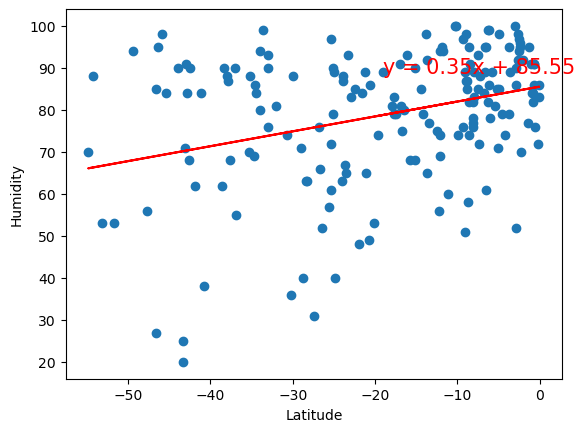

In [38]:
# Southern Hemisphere
#Defining arguments for liear regrssion plotting fuction 
#(the latitude variable and label was defined previously)
south_hum = southern_hemi_df["Humidity"]
south_hum_lbl = "Humidity"

#Plotting the graph and displaying r-value
lin_reg_plot(south_lat, south_hum, south_lat_lbl, south_hum_lbl)

**Discussion about the linear relationship:** Both graphs show some positive correlation between latititude and humidity, with weaker relationship in these variables in Southern Hemisphere. As a result we can assume that with increase in latitude there is some increse of humidity in both southern and northern hemispheres. However, due to real-time character of the data, rather than historical, there might be significant seasonal bias.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10950014500667757


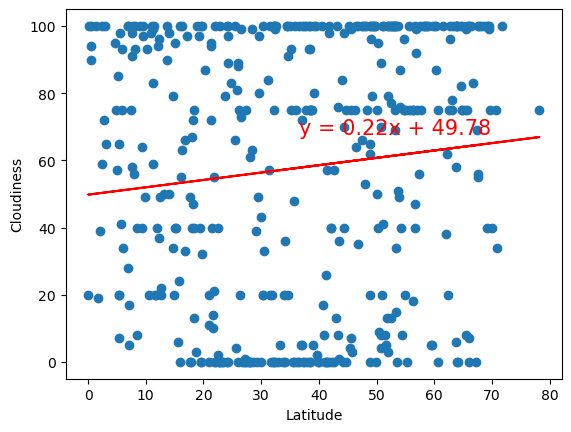

In [39]:
# Northern Hemisphere
#Defining arguments for liear regrssion plotting fuction 
north_cloud = northern_hemi_df["Cloudiness"]
cloud_lbl = "Cloudiness"

#Plotting the graph and displaying r-value
lin_reg_plot(north_lat, north_cloud, north_lat_lbl, cloud_lbl)

The r-value is: 0.1822749255170125


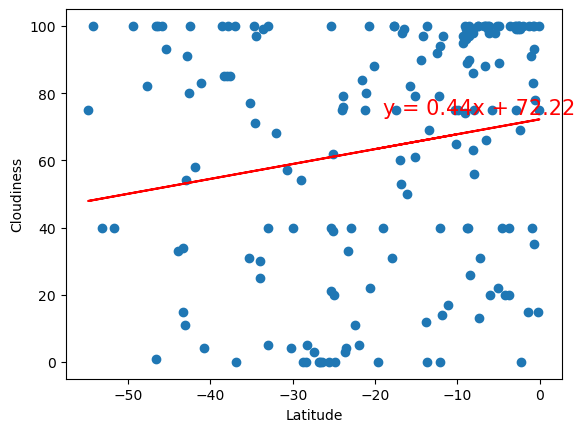

In [40]:
# Southern Hemisphere
#Defining arguments for liear regrssion plotting fuction (y label was deffined previously) 
south_cloud = southern_hemi_df["Cloudiness"]

#Plotting the graph and displaying r-value
lin_reg_plot(south_lat, south_cloud, south_lat_lbl, cloud_lbl)

**Discussion about the linear relationship:** There are very little correlation between cloudiness and increase in latitude in both hemispheres. The graph for southern hemisphere depicts slightly better relationship; however, still not significant. This fact is also strengthen by r values for both hemispheres, as both of them are close to 0.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.08779323544962107


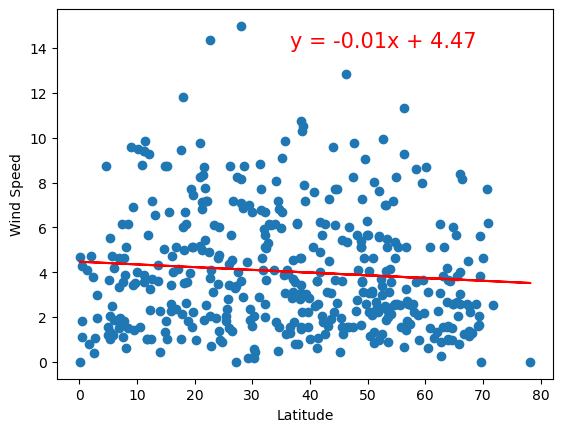

In [41]:
# Northern Hemisphere
#Defining arguments for liear regrssion plotting fuction
north_wind = northern_hemi_df["Wind Speed"]
wind_lbl = "Wind Speed"

#Plotting the graph and displaying r-value
lin_reg_plot(north_lat, north_wind, north_lat_lbl, wind_lbl)

The r-value is: -0.42632137384351004


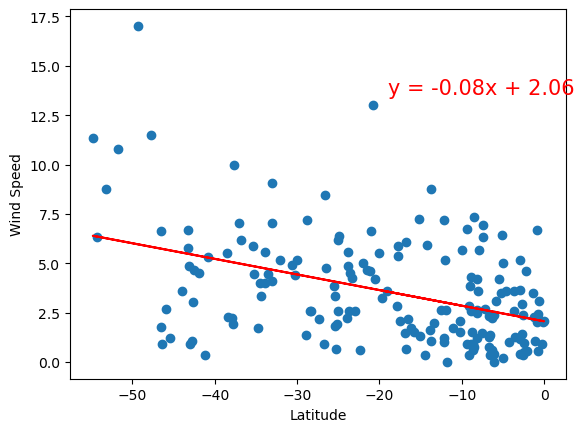

: 

In [42]:
# Southern Hemisphere
#Defining arguments for liear regrssion plotting fuction
south_wind = southern_hemi_df["Wind Speed"]

#Plotting the graph and displaying r-value
lin_reg_plot(south_lat, south_wind, south_lat_lbl, wind_lbl)

**Discussion about the linear relationship:** The relationships between wind speed and latitude in both northern and southern hemispheres is also negligable, with southern hemisphere shows slitly better negative correlation. This also checks with its r absolute value being bigger and closer to 1. 